In [111]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import seaborn as sns 
plt.rcParams['figure.figsize'] = [16, 12]


In [112]:
def mouse_callback(event, x, y, flags, param):
    global positions
    if event == cv2.EVENT_LBUTTONDOWN:
        positions.append((x, y))

image = cv2.imread("./4.png")
in_img = cv2.imread("./4.png")

cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)
positions = []

while True:
    break
    # Display the image
    cv2.imshow("Image", image)
    # Check for key press
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyWindow("Image")
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        break

# Close all windows
cv2.destroyAllWindows()


points = np.array([[[1027,1016], [1086, 1014], [1086, 1027], [1027, 1030]],
                  [[920,997], [950, 995], [950, 1002], [920, 1004]],
                  [[858,994], [876, 995], [876, 999], [858, 1001]],
                  [[680,1064], [740, 1060], [742, 1075], [679, 1078]],
                  [[309,1101], [372, 1096], [371, 1113], [306, 1116]],
                  [[31,1048], [79, 1046], [79, 1060], [31, 1062]]])

positions = points

for pos in np.reshape(positions,(-1,2)):
    cv2.circle(image, pos, 5, (91, 80, 242), -1) 

(6, 4, 2)


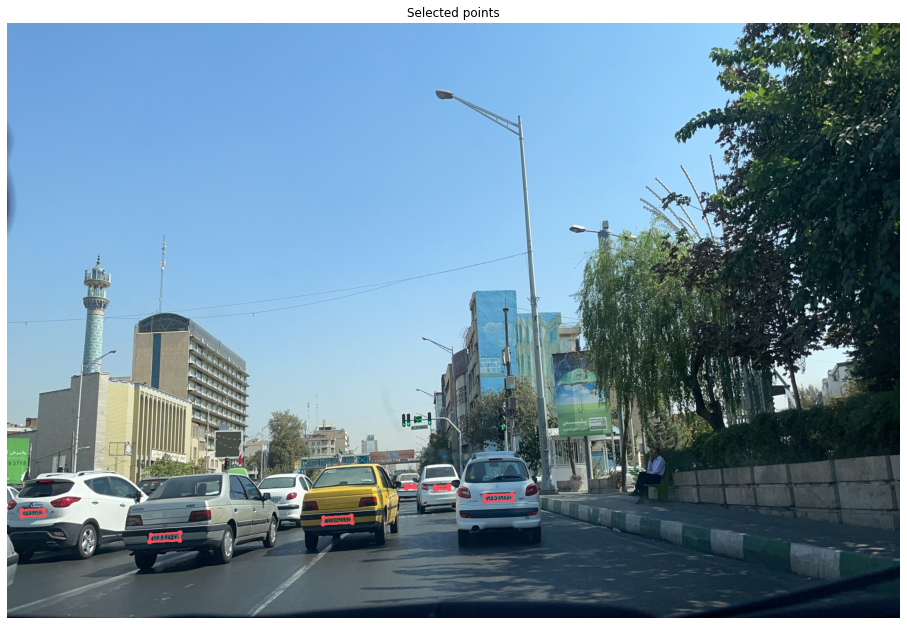

In [119]:
positions = np.array(positions)
print(positions.shape)
lics = np.reshape(positions,(-1,4,2))
for l in  range(lics.shape[0]):
    cv2.line(image,pt1=lics[l,0,:],pt2=lics[l,1,:],color=(91,80,242),thickness=4)
    cv2.line(image,pt1=lics[l,1,:],pt2=lics[l,2,:],color=(91,80,242),thickness=4)
    cv2.line(image,pt1=lics[l,2,:],pt2=lics[l,3,:],color=(91,80,242),thickness=4)
    cv2.line(image,pt1=lics[l,3,:],pt2=lics[l,0,:],color=(91,80,242),thickness=4)
    
    
plt.imshow(image[:,:,::-1])
plt.axis("off")
plt.title("Selected points")
plt.show()

In [123]:
CameraMatrix = np.array([[1.41546024e3, 0 , 9.64916262e2 ],[0,1.67670492e3, 6.06212729e2],[0,0,1]])
Names = ["White 206","White Sayni","White Samand","Taxi","405","White JAC"]
j = 0

for _license in lics:
    _ref2D = _license.astype(np.float32)
    _ref3D = np.array([[0, 0, 0], [52, 0, 0], [52, 11, 0], [0, 11, 0]],dtype=np.float32)

    success, rotation_vector, translation_vector = cv2.solvePnP(_ref3D, _ref2D, CameraMatrix, distCoeffs=None)
    print("=============\n=> "+Names[j]+ ": \n-->Translation vector :",np.round(translation_vector.T[0],4),"\n--> Rotation vector ->",np.round(rotation_vector.T[0],4))
    j += 1


=> White 206: 
-->Translation vector : [  54.3762  303.27   1240.1381] 
--> Rotation vector -> [ 0.2444 -0.0456 -0.0197]
=> White Sayni: 
-->Translation vector : [ -77.2277  567.1187 2433.2979] 
--> Rotation vector -> [ 0.2186 -0.1351 -0.0103]
=> White Samand: 
-->Translation vector : [-257.7213  790.6281 3412.1209] 
--> Rotation vector -> [-0.2143 -0.6478  0.056 ]
=> Taxi: 
-->Translation vector : [-243.5973  329.4619 1207.4068] 
--> Rotation vector -> [-0.6737 -0.2619 -0.0667]
=> 405: 
-->Translation vector : [-544.2144  345.99   1173.7015] 
--> Rotation vector -> [-0.5039 -0.037  -0.0508]
=> White JAC: 
-->Translation vector : [-888.8763  354.9886 1347.2099] 
--> Rotation vector -> [-0.0886  0.1716 -0.0684]
